<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/notebooks/01c_challenges_and_extra_curriculum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises / extra curriculum Section 3

In [59]:

# history visualizer helper from previous notebook
import pandas as pd
def plot_history(history):
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [1]:
import math
import tensorflow as tf

y = list(map(lambda val: (val**2 - 5*val) / 768, range(1, 10000)))
X = list(range(1, 10000))

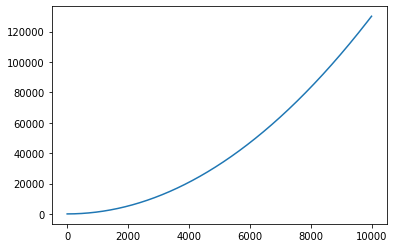

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y)


In [3]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_train = tf.constant(y_train)
X_train = tf.constant(X_train)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [4]:
model_1 = tf.keras.models.Sequential([
tf.keras.layers.Dense(100),
tf.keras.layers.Dense(10),
tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="model_1")

model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"],
                loss="mae")

history_1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10, verbose=0)


In [5]:
model_1.evaluate(X_test, y_test)

63/63 [==============================] - 1s 4ms/step - loss: 12454.7100 - mae: 12454.7100


[12454.7099609375, 12454.7099609375]

In [6]:
y_pred = model_1.predict(X_test)

63/63 [==============================] - 1s 5ms/step


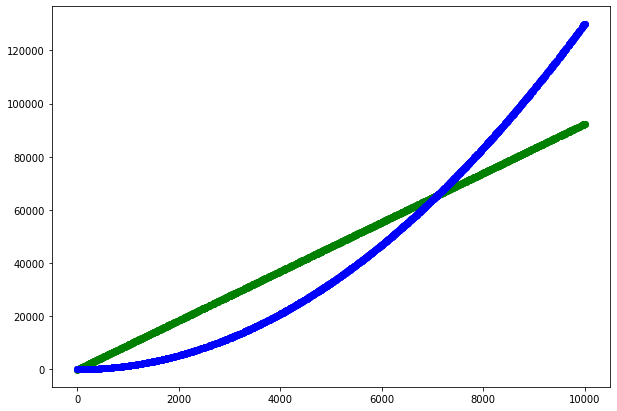

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_pred, c="g")
plt.scatter(X_test, y_test, c="b")

Seems like there is no good linear solution to a set where the dependent variable is the result of an exponential equation of the independent variable.

## 2. Try and improve the results we got on the insurance dataset, some things you might want to try include:

- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
- What happens if you train for longer (say 300 epochs instead of 200)?

Reminder: last best loss was 3171 converging after ~80 epochs


In [8]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9de47e9640>,
      dtype=object)

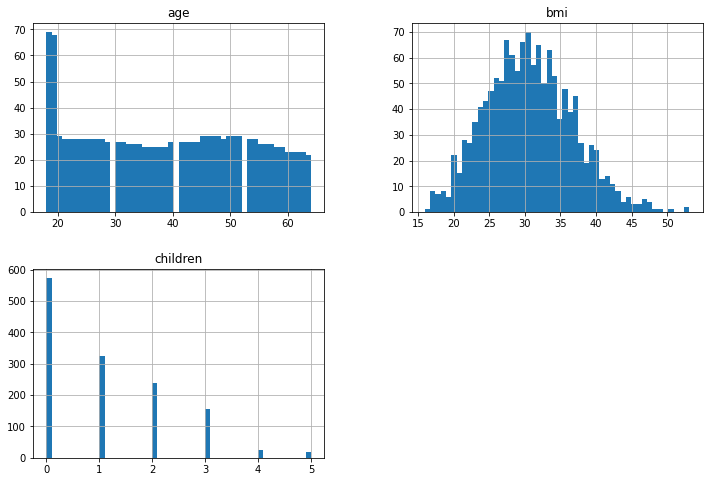

In [11]:
insurance.hist(bins=50, figsize=(12,8), column=['age', 'bmi', 'children'])

age seems to be capped at 16 or 18, bmi is slightly skewed right but ok.



In [12]:
# one-hot encode smoker and sex
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [46]:
# split data
X = insurance.drop("charges", axis=1)
y = insurance['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [47]:
# scale / normalize data
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"])
, remainder='passthrough')

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children'])])

In [54]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [55]:
x_train_normal_df = pd.DataFrame(X_train_normal, columns=X_train.columns)
x_train_normal_df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.239440,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.456522,0.493947,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.782609,0.148238,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.414044,0.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.456522,0.212806,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.869565,0.247915,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1068,0.413043,0.851224,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [86]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="model_1_4x10layers")

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss="mae", 
                metrics=["mae"])

history_1 = model_1.fit(X_train_normal, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 1s 2ms/step - loss: 13290.6016 - mae: 13290.6016
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 11628.3564 - mae: 11628.3564
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 7915.5225 - mae: 7915.5225
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 7402.1772 - mae: 7402.1772
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 6798.7036 - mae: 6798.7036
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 5788.1514 - mae: 5788.1514
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 4312.2036 - mae: 4312.2036
Epoch 8/10
34/34 [==============================] - 0s 3ms/step - loss: 3680.7214 - mae: 3680.7214
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: 3637.0564 - mae: 3637.0564
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 3632.4519 - mae: 3632.4519


In [87]:
model_1.summary()

Model: "model_1_4x10layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                120       
                                                                 
 dense_97 (Dense)            (None, 10)                110       
                                                                 
 dense_98 (Dense)            (None, 10)                110       
                                                                 
 dense_99 (Dense)            (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [88]:
model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3362.9734 - mae: 3362.9734


[3362.973388671875, 3362.973388671875]

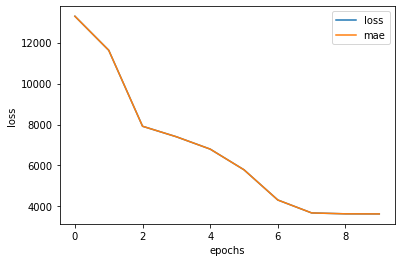

In [89]:
plot_history(history_1)

**Intermediate result:** model_1 converges after only 7 epochs with an only slightly worse result (~3200 vs ~3400)

In [94]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
], name="model_2")

# note: changing to "mse" made the losses gigantic
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss="mae", 
                metrics=["mae"])

history_2 = model_2.fit(X_train_normal, y_train, epochs=10, verbose=1)
model_2.summary()

Epoch 1/10
34/34 [==============================] - 1s 4ms/step - loss: 13158.1152 - mae: 13158.1152
Epoch 2/10
34/34 [==============================] - 0s 4ms/step - loss: 8994.6953 - mae: 8994.6953
Epoch 3/10
34/34 [==============================] - 0s 5ms/step - loss: 7510.2539 - mae: 7510.2539
Epoch 4/10
34/34 [==============================] - 0s 6ms/step - loss: 6423.8672 - mae: 6423.8672
Epoch 5/10
34/34 [==============================] - 0s 8ms/step - loss: 4375.5073 - mae: 4375.5073
Epoch 6/10
34/34 [==============================] - 0s 6ms/step - loss: 3661.2073 - mae: 3661.2073
Epoch 7/10
34/34 [==============================] - 0s 5ms/step - loss: 3606.0896 - mae: 3606.0896
Epoch 8/10
34/34 [==============================] - 0s 6ms/step - loss: 3693.9207 - mae: 3693.9207
Epoch 9/10
34/34 [==============================] - 0s 9ms/step - loss: 3595.6548 - mae: 3595.6548
Epoch 10/10
34/34 [==============================] - 0s 3ms/step - loss: 3537.8179 - mae: 3537.8179
Model: 

In [96]:
model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3230.9958 - mae: 3230.9958


[3230.995849609375, 3230.995849609375]

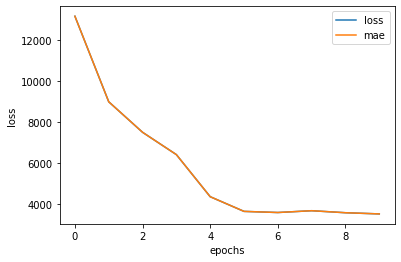

In [97]:
plot_history(history_2)

Explanation of learning rate (or rather its effect): "A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck"

## 3. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

https://github.com/keras-team/keras/blob/v2.11.0/keras/datasets/boston_housing.py

In [102]:
boston = tf.keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston.load_data(path="boston_housing.npz", test_split=0.2, seed=42)

In [101]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

How do i get headers / what means what?

Link in the description:

http://lib.stat.cmu.edu/datasets/boston

Variables in order:

-  CRIM     per capita crime rate by town
-  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
-  INDUS    proportion of non-retail business acres per town
-  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
-  NOX      nitric oxides concentration (parts per 10 million)
-  RM       average number of rooms per dwelling
-  AGE      proportion of owner-occupied units built prior to 1940
-  DIS      weighted distances to five Boston employment centres
-  RAD      index of accessibility to radial highways
-  TAX      full-value property-tax rate per $10,000

-  PTRATIO  pupil-teacher ratio by town
-  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-  LSTAT    % lower status of the population
-  MEDV     Median value of owner-occupied homes in $1000's

